In [1]:
#NOTEBOOK TO TRAIN 

In [127]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [25]:
!python3 main.py --output_dir 'log' \
--train_hr_data_path '/home/mainuser/datadrive/predata/data/train/hr/numpy_train_hr128.npy' \
--train_lr_data_path '/home/mainuser/datadrive/predata/data/train/lr/numpy_train_lr128.npy' \
--train_mask_path '/home/mainuser/datadrive/predata/masks/Train_gaussian2d_0.2.npy' \
--valid_hr_data_path '/home/mainuser/datadrive/predata/data/valid/hr/numpy_valid_hr128.npy' \
--valid_lr_data_path '/home/mainuser/datadrive/predata/data/valid/lr/numpy_valid_lr128.npy' \
--valid_mask_path '/home/mainuser/datadrive/predata/masks/Train_gaussian2d_0.2.npy' \
--performTL 'False' \
--get_params 'False' \
--gpu '1'

2023-04-22 18:22:55.131759: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 18:22:55.774404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Start Loading Dataset from /home/mainuser/datadrive/predata/data/train/hr/numpy_train_hr128.npy, 
Mask from /home/mainuser/datadrive/predata/masks/Train_gaussian2d_0.2.npy
/home/mainuser/datadrive/predata/data/train/hr/numpy_train_hr128.npy /home/mainuser/datadrive/predata/data/train/lr/numpy_train_lr128.npy
Train data num : 8
valid data num : 48 
Sampled Ratio: 0.2499 
Dataset load time : 1 

GPU INFO 1
Device 0: NVIDIA A100 80GB PCIe
ID 0
	Device ID: 0
GPU 0: NVIDIA A100 80GB PCIe
	Total memory: 79.17 GB
	Multiprocessors: 108
	Total memory: 85.01 GB
	Alloc

In [61]:
!zip -r ddks.zip DualDomainKSpace

updating: DualDomainKSpace/ (stored 0%)
  adding: DualDomainKSpace/loss_function.py (deflated 53%)
  adding: DualDomainKSpace/generate_mask.py (deflated 54%)
  adding: DualDomainKSpace/train.py (deflated 80%)
  adding: DualDomainKSpace/layers.py (deflated 77%)
  adding: DualDomainKSpace/multi_head_attn.py (deflated 66%)
  adding: DualDomainKSpace/kspace.zip (stored 0%)
  adding: DualDomainKSpace/fftc.py (deflated 82%)
  adding: DualDomainKSpace/Ktransformer.py (deflated 75%)
  adding: DualDomainKSpace/og_params.csv (deflated 92%)
  adding: DualDomainKSpace/utils.py (deflated 82%)
  adding: DualDomainKSpace/visualisation.ipynb (deflated 69%)
  adding: DualDomainKSpace/requirements.txt (stored 0%)
  adding: DualDomainKSpace/README.md (deflated 49%)
  adding: DualDomainKSpace/.git/ (stored 0%)
  adding: DualDomainKSpace/.git/objects/ (stored 0%)
  adding: DualDomainKSpace/.git/objects/36/ (stored 0%)
  adding: DualDomainKSpace/.git/objects/36/3fcab7ed6e9634e198cf5555ceb88932c9a245 (stored

In [1]:
!nvidia-smi


Sat Apr 22 13:03:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.85.02    Driver Version: 510.85.02    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100 80G...  Off  | 00000001:00:00.0 Off |                    0 |
| N/A   38C    P0    77W / 300W |  81061MiB / 81920MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100 80G...  Off  | 00000002:00:00.0 Off |                    0 |
| N/A   

In [164]:
import torch 
torch.__version__
import numpy as np
import matplotlib.pyplot as plt

In [165]:
o1=np.load('new1.npy')
o2=np.load('new2.npy')
o1=o1[:,:,0]+1j*o1[:,:,1]
o2=o2[:,:,0]+1j*o2[:,:,1]
o11=np.fft.ifftshift(np.fft.ifft2(o1))

In [138]:
o1=np.abs(o1)

In [139]:
o1.shape

(64, 64)

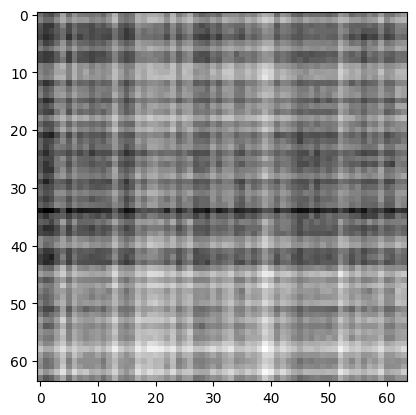

In [167]:
plt.imshow(np.abs(o2),cmap='gray')

In [195]:
import torch 

g=torch.tensor([3,2,4],dtype=torch.complex32)

In [196]:
x=g.real+1j*g.imag

In [204]:
x=torch.cat((g.real.unsqueeze(0),g.imag.unsqueeze(0)),dim=0)

In [206]:
x.shape

torch.Size([2, 3])

Ktransformer.py     generate_mask.py	new2.npy	  train.py
Log		    igt.npy		og_params.csv	  ulri.npy
README.md	    kspace.zip		params.csv	  ulrk.npy
Untitled.ipynb	    layers.py		perform_tl.py	  utils.py
__pycache__	    loss_function.py	requirements.txt  visualisation.ipynb
data_preprocess.py  main.py		sampling.py
dataset.py	    multi_head_attn.py	test.py
fftc.py		    new1.npy		train.ipynb
